In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(
    r'C:\Users\Tibi\Desktop\notebooks\credit card fraud detection\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
# all of the data is float64 and in a similar range (except the target class variable is either 0 or 1, 1 in case of fraud)
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
# returns a numpy representation without the specified columns
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values  # returns numpy representation

In [8]:
# very unbalanced dataset
f"Shapes of X={X.shape} , y={y.shape}, #Fraud cases={y.sum()}"

'Shapes of X=(284807, 28) , y=(284807,), #Fraud cases=492'

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# splitting dataset with equal precentage of fraud cases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, stratify=y, random_state=42)
print(y_test.sum(), y_train.sum())

123 369


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train).predict(X).sum()

357

In [13]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    # class_weight gives different weights to each class,
                    param_grid={'class_weight': [
                        {0: 1, 1: v}for v in range(1, 4)]},
                    # in our case, the positive(fraud) class should have higher weight for higher acc.
                    cv=4,
                    n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [15]:
# the test scores are high, because it is the accuracy of the model and there are very few fraud cases,
pd.DataFrame(grid.cv_results_)
# so we need a different scoring function

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,4.206227,0.541552,0.018506,0.007891,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.999214,0.999213,0.999176,0.999307,0.999228,0.000048,3
1,3.583080,0.423380,0.030507,0.006804,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.999438,0.999251,0.999195,0.999288,0.999293,0.000090,2
2,3.956668,0.309625,0.012253,0.009178,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.999438,0.999307,0.999232,0.999288,0.999316,0.000075,1


In [16]:
??model.score

Signature: model.score(X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """
        Return the mean accuracy on the given test data and labels.

        In multi-label classification, this is the subset accuracy
        which is a harsh metric since you require for each sample that
        each label set be correctly predicted.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            True labels for `X`.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights.

        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` w.r.t. `y`.
        """
        from .metrics import accuracy_score

        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
File:      c:\users\tibi\appdata\local\programs\p

In [17]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [18]:
# precision : proportion of correctly indentified positive cases (actually positive/predicted positive)
# recall: out of all the positive cases how many were identifyed correctly
# Note: in this case the positive cases are the fraud cases
print('recall and precision scores on train:', recall_score(y_true=y_train, y_pred=grid.predict(
    X_train)), precision_score(y_true=y_train, y_pred=grid.predict(X_train)))
print('recall and precision scores on test:', recall_score(y_true=y_test, y_pred=grid.predict(
    X_test)), precision_score(y_true=y_test, y_pred=grid.predict(X_test)))

recall and precision scores on train: 0.7723577235772358 0.8260869565217391
recall and precision scores on test: 0.7642276422764228 0.7642276422764228


In [20]:
# rerunning gridsearch with precision and recall as metrics
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    param_grid={'class_weight': [{0: 1, 1: v}
                                                 for v in np.linspace(1, 20, 30)]},
                    cv=4,
                    n_jobs=-1,
                    scoring={'recall': make_scorer(recall_score),
                             'precision': make_scorer(precision_score)},
                    refit='precision',
                    return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},
                                          {...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [21]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,...,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,mean_train_precision,std_train_precision
0,2.877920,0.434400,0.083271,0.002047,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.623656,0.663043,0.608696,0.673913,...,0.898551,0.878270,0.019894,1,0.897959,0.891626,0.893939,0.874396,0.889480,0.008999
1,2.932683,0.193564,0.146784,0.115687,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",0.741935,0.717391,0.663043,0.717391,...,0.835443,0.840138,0.028566,2,0.847826,0.879828,0.854077,0.847458,0.857297,0.013272
2,5.836107,1.139363,0.297569,0.364389,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",0.784946,0.760870,0.695652,0.760870,...,0.804598,0.827685,0.032675,3,0.828685,0.846774,0.840467,0.840637,0.839141,0.006550
3,4.077448,0.947421,0.086769,0.013084,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",0.806452,0.782609,0.695652,0.782609,...,0.800000,0.823309,0.025743,4,0.817829,0.844622,0.834586,0.841270,0.834577,0.010322
4,5.014666,1.816615,0.134531,0.065255,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",0.806452,0.826087,0.706522,0.793478,...,0.784946,0.819766,0.025396,5,0.811321,0.829457,0.829630,0.837838,0.827061,0.009698
5,5.259474,2.225235,0.115280,0.051880,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",0.817204,0.847826,0.706522,0.804348,...,0.778947,0.808916,0.031437,6,0.804428,0.825095,0.817204,0.828897,0.818906,0.009363
6,4.082195,1.048520,0.134031,0.060077,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",0.817204,0.847826,0.706522,0.826087,...,0.767677,0.806099,0.034365,7,0.799270,0.820225,0.809187,0.827068,0.813937,0.010602
7,4.653833,1.352089,0.095773,0.003701,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",0.817204,0.847826,0.706522,0.836957,...,0.770000,0.804749,0.035377,8,0.802158,0.817844,0.804196,0.825279,0.812369,0.009588
8,5.386752,3.019420,0.090271,0.004266,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.817204,0.847826,0.706522,0.836957,...,0.770000,0.799179,0.041307,9,0.797872,0.803636,0.798611,0.822222,0.805586,0.009858
9,3.349026,0.228965,0.089520,0.003203,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.817204,0.847826,0.706522,0.836957,...,0.754902,0.793619,0.046271,10,0.796491,0.794326,0.796552,0.812274,0.799911,0.007194


In [22]:
grid.best_score_

0.8782701597918989

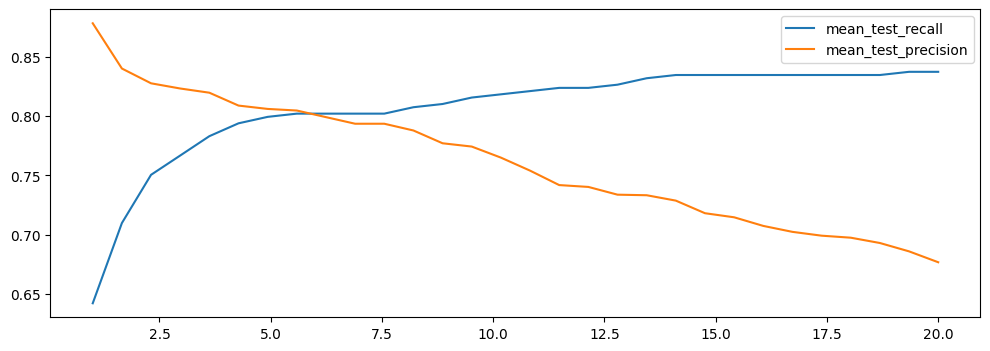

In [23]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
             df_results[score], label=score)
plt.legend()

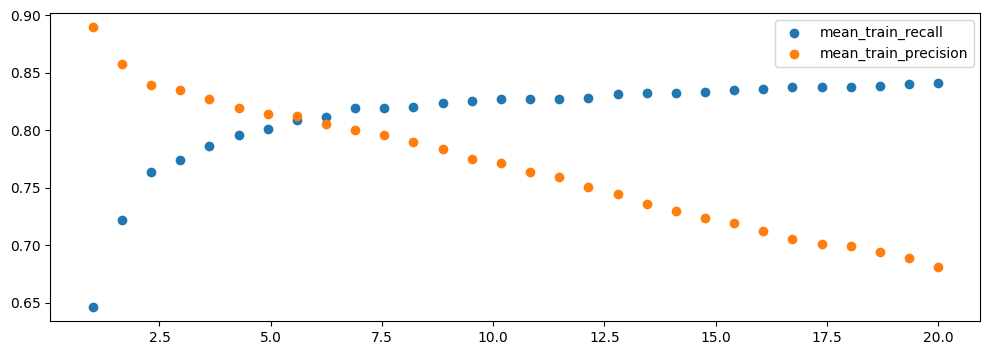

In [24]:
plt.figure(figsize=(12, 4))
for score in ['mean_train_recall', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']],
                y=df_results[score.replace('test', 'train')],
                label=score)
plt.legend()

If we want to balance precision and recall we can make our own scoring function, in this case the min(precision,recall) would work well.

In [25]:
def min_recall_precision(y_true, y_pred):
    return min(precision_score(y_true, y_pred), recall_score(y_true, y_pred))

In [26]:
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    param_grid={'class_weight': [{0: 1, 1: v}
                                                 for v in np.linspace(1, 20, 30)]},
                    cv=10,
                    n_jobs=-1,
                    scoring={'recall': make_scorer(recall_score),  # make_scorer(greater_is_better) should be set in case of a metric where lower scores are better
                             'precision': make_scorer(precision_score),
                             'min_prec_recall': make_scorer(min_recall_precision)},  # added it as a scoring function
                    # refits based on the minimum of recall and precision to balance the two
                    refit='min_prec_recall',
                    return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_prec_recall', return_train_score=True,
             scoring={'min_prec_recall': make_scorer(min_recall_precision),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

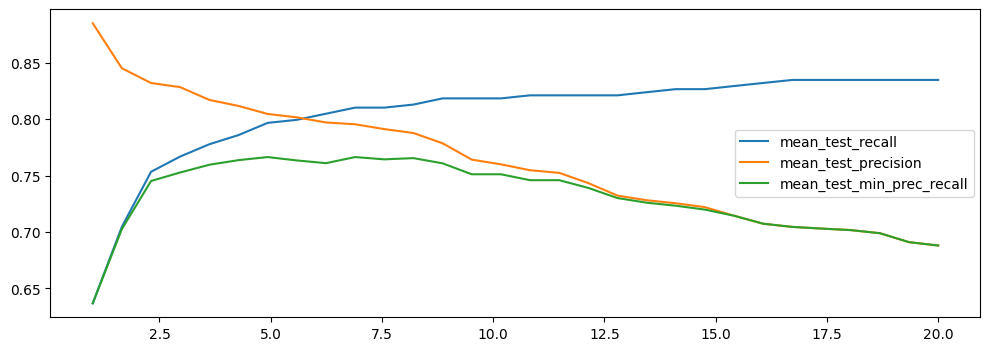

In [27]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_prec_recall']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
             df_results[score], label=score)
plt.legend()

In [28]:
s=make_scorer(min_recall_precision)
??s

Signature:       s(estimator, X, y_true, sample_weight=None, **kwargs)
Type:            _PredictScorer
String form:     make_scorer(min_recall_precision)
File:            c:\users\tibi\appdata\local\programs\python\python310\lib\site-packages\sklearn\metrics\_scorer.py
Source:         
class _PredictScorer(_BaseScorer):
    def _score(self, method_caller, estimator, X, y_true, **kwargs):
        """Evaluate predicted target values for X relative to y_true.

        Parameters
        ----------
        method_caller : callable
            Returns predictions given an estimator, method name, and other
            arguments, potentially caching results.

        estimator : object
            Trained estimator to use for scoring. Must have a `predict`
            method; the output of that is used to compute the score.

        X : {array-like, sparse matrix}
            Test data that will be fed to estimator.predict.

        y_true : array-like
            Gold standard target values 

In [29]:
# by writing the function this way we dont need to pass it to make_scorer
# sample_weight assigns different weights to specific samples(multiplied by class_weight)
def min_recall_precision_without_scorer_need(estimator, X, y_true, sample_weight=None):
    # give more weight to each sample
    y_pred = estimator.predict(X)
    return min(precision_score(y_pred=y_pred, y_true=y_true), recall_score(y_true=y_true, y_pred=y_pred))

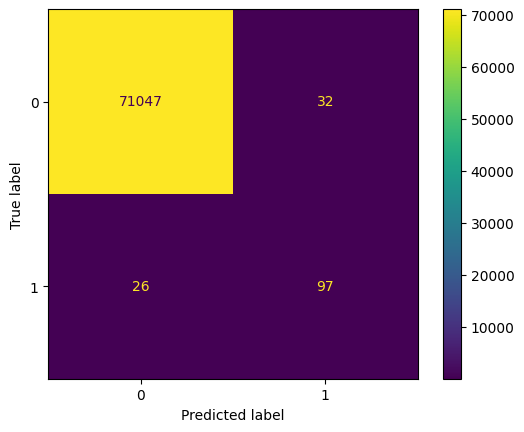

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = grid.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_pred, values_format='d')

Boosting algorithms like XGBoost should be tried, since they work well with inbalanced data, or randomly sampling to have an equal amount of cases for each class.

In [31]:
print('recall and precision scores on train:', recall_score(y_true=y_train, y_pred=grid.predict(
    X_train)), precision_score(y_true=y_train, y_pred=grid.predict(X_train)))
print('recall and precision scores on test:', recall_score(y_true=y_test, y_pred=grid.predict(
    X_test)), precision_score(y_true=y_test, y_pred=grid.predict(X_test)))

recall and precision scores on train: 0.8021680216802168 0.8131868131868132
recall and precision scores on test: 0.7886178861788617 0.751937984496124


In [32]:
from sklearn.metrics import classification_report

In [36]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10,
                                                 100, 1000], 'class_weight': [{0: 1, 1: v}for v in np.linspace(1, 20, 30)]}

In [ ]:
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    param_grid=log_reg_params,
                    cv=10,
                    n_jobs=-1,
                    scoring={'recall': make_scorer(recall_score),  # make_scorer(greater_is_better) should be set in case of a metric where lower scores are better
                             'precision': make_scorer(precision_score),
                             'min_prec_recall': make_scorer(min_recall_precision)},  # added it as a scoring function
                    # refits based on the minimum of recall and precision to balance the two
                    refit='min_prec_recall',
                    return_train_score=True)
grid.fit(X_train, y_train)

In [39]:
grid.best_params_

{'C': 0.001, 'class_weight': {0: 1, 1: 8.206896551724139}, 'penalty': 'l2'}

In [42]:
y_pred_t = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
print(classification_report(y_pred=y_pred_t, y_true=y_train))
print(classification_report(y_true=y_test, y_pred=y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.81      0.80      0.80       369

    accuracy                           1.00    213605
   macro avg       0.91      0.90      0.90    213605
weighted avg       1.00      1.00      1.00    213605

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.77      0.80      0.78       123

    accuracy                           1.00     71202
   macro avg       0.88      0.90      0.89     71202
weighted avg       1.00      1.00      1.00     71202



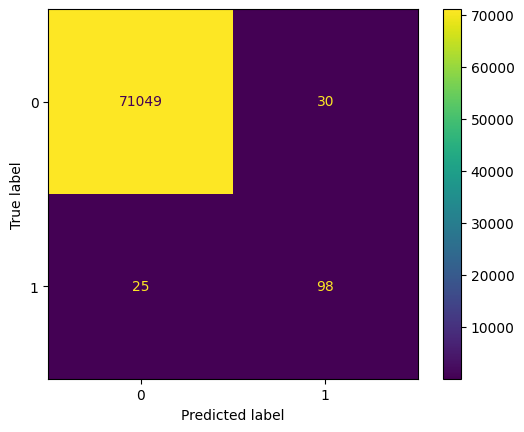

: 

In [45]:
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_test, y_true=y_test)